In [1]:
# =============================
# 1. Importing libraries
# =============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_score, recall_score

import re
from sklearn.feature_extraction import text

In [2]:
# =============================
# 2. Loading dataset
# =============================

import pandas as pd
from sklearn.datasets import fetch_openml
spam = fetch_openml(name="spambase", version=1)
df = pd.DataFrame(data=spam.data, columns=spam.feature_names)
df['Class'] = spam.target

print(df.head())
print(df['Class'].value_counts())

   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_%3B  char_freq_%28  \
0             0.00            0.00  ...           0.00          0.0

In [5]:
# =============================
# 3. Spliting dataset
# =============================

# The features are all columns except 'Class'
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3680, 57)
X_test shape: (921, 57)
y_train shape: (3680,)
y_test shape: (921,)


In [11]:
# =============================
# 4. Training models
# =============================

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       558
           1       0.72      0.71      0.71       363

    accuracy                           0.78       921
   macro avg       0.77      0.76      0.77       921
weighted avg       0.78      0.78      0.78       921

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.92       921
weighted avg       0.93      0.93      0.93       921



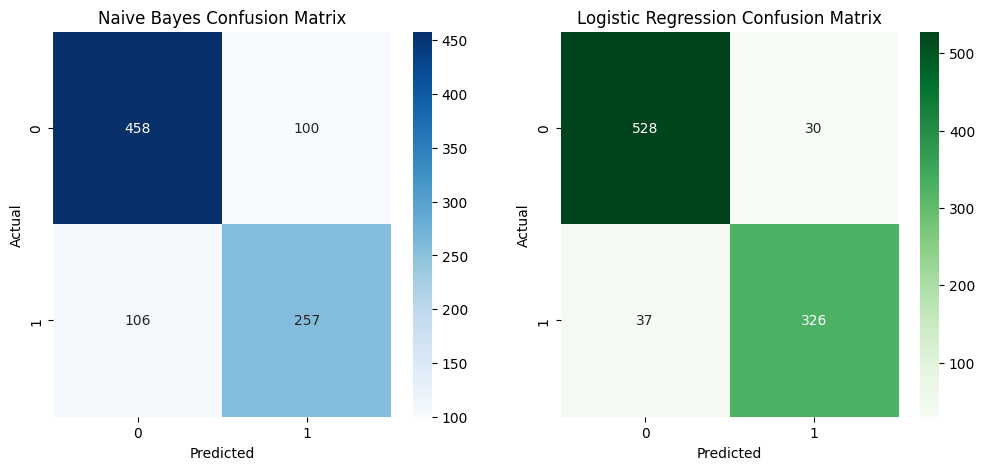

In [12]:
# =============================
# 5. Evaluation
# =============================

# Predictions
nb_preds = nb_model.predict(X_test)
lr_preds = lr_model.predict(X_test)

# Classification reports
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_preds))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_preds))

# Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt='d', cmap="Blues", ax=ax[0])
ax[0].set_title("Naive Bayes Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d', cmap="Greens", ax=ax[1])
ax[1].set_title("Logistic Regression Confusion Matrix")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.show()

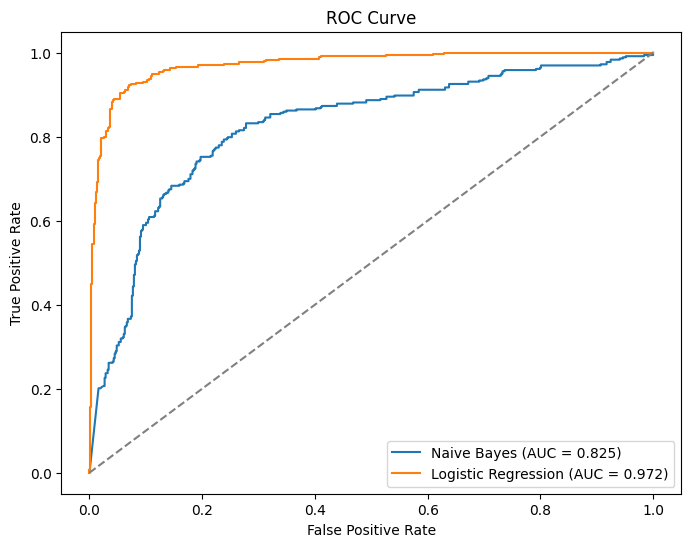

In [13]:
# =============================
# 6. ROC Curve
# =============================

nb_probs = nb_model.predict_proba(X_test)[:,1]
lr_probs = lr_model.predict_proba(X_test)[:,1]

y_test_binary = y_test.astype(int)

nb_fpr, nb_tpr, _ = roc_curve(y_test_binary, nb_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_binary, lr_probs)

plt.figure(figsize=(8,6))
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {auc(nb_fpr, nb_tpr):.3f})")
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {auc(lr_fpr, lr_tpr):.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

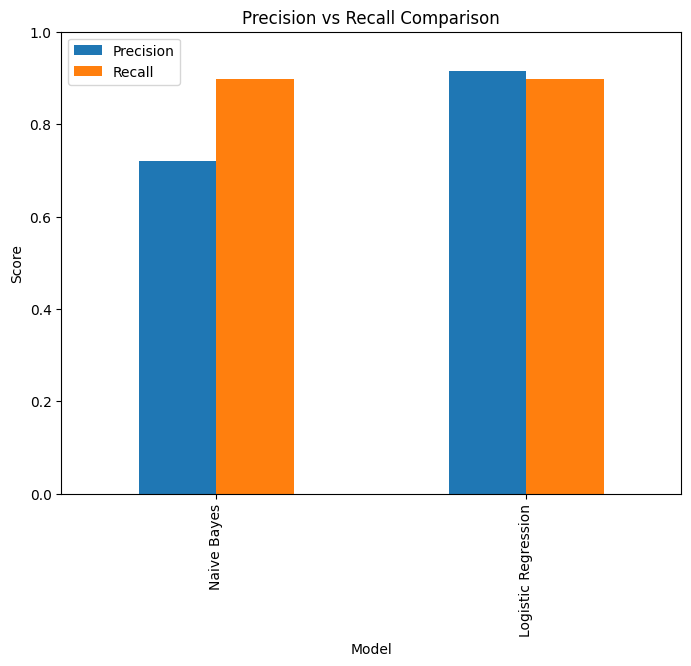

In [14]:
# =============================
# 7. Precision / Recall comparison
# =============================

nb_precision = precision_score(y_test, nb_preds, pos_label="1")
nb_recall = recall_score(y_test, nb_preds, pos_label="1")

lr_precision = precision_score(y_test, lr_preds, pos_label="1")
lr_recall = recall_score(y_test, lr_preds, pos_label="1")

comparison = pd.DataFrame({
    "Model": ["Naive Bayes", "Logistic Regression"],
    "Precision": [nb_precision, lr_precision],
    "Recall": [lr_recall, lr_recall]
})

comparison.plot(x="Model", y=["Precision", "Recall"], kind="bar", figsize=(8,6))
plt.title("Precision vs Recall Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.show()